In [1]:
#import warnings
#warnings.filterwarnings('ignore') # make the notebook nicer

In [4]:
#conda install -c ambermd pytraj
#conda install -c bioconda nglview
#jupyter-nbextension enable nglview --py --sys-prefix
#%matplotlib widget

In [1]:
#interactive 
import pytraj as pt
import nglview as nv
from subprocess import call
f = open("helix.pdb", "w")
call(["./fd_helix", "abdna","aaaaaaaaaa"], stdout=f)
traj = pt.load('helix.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [2]:
# static image 
view.render_image()

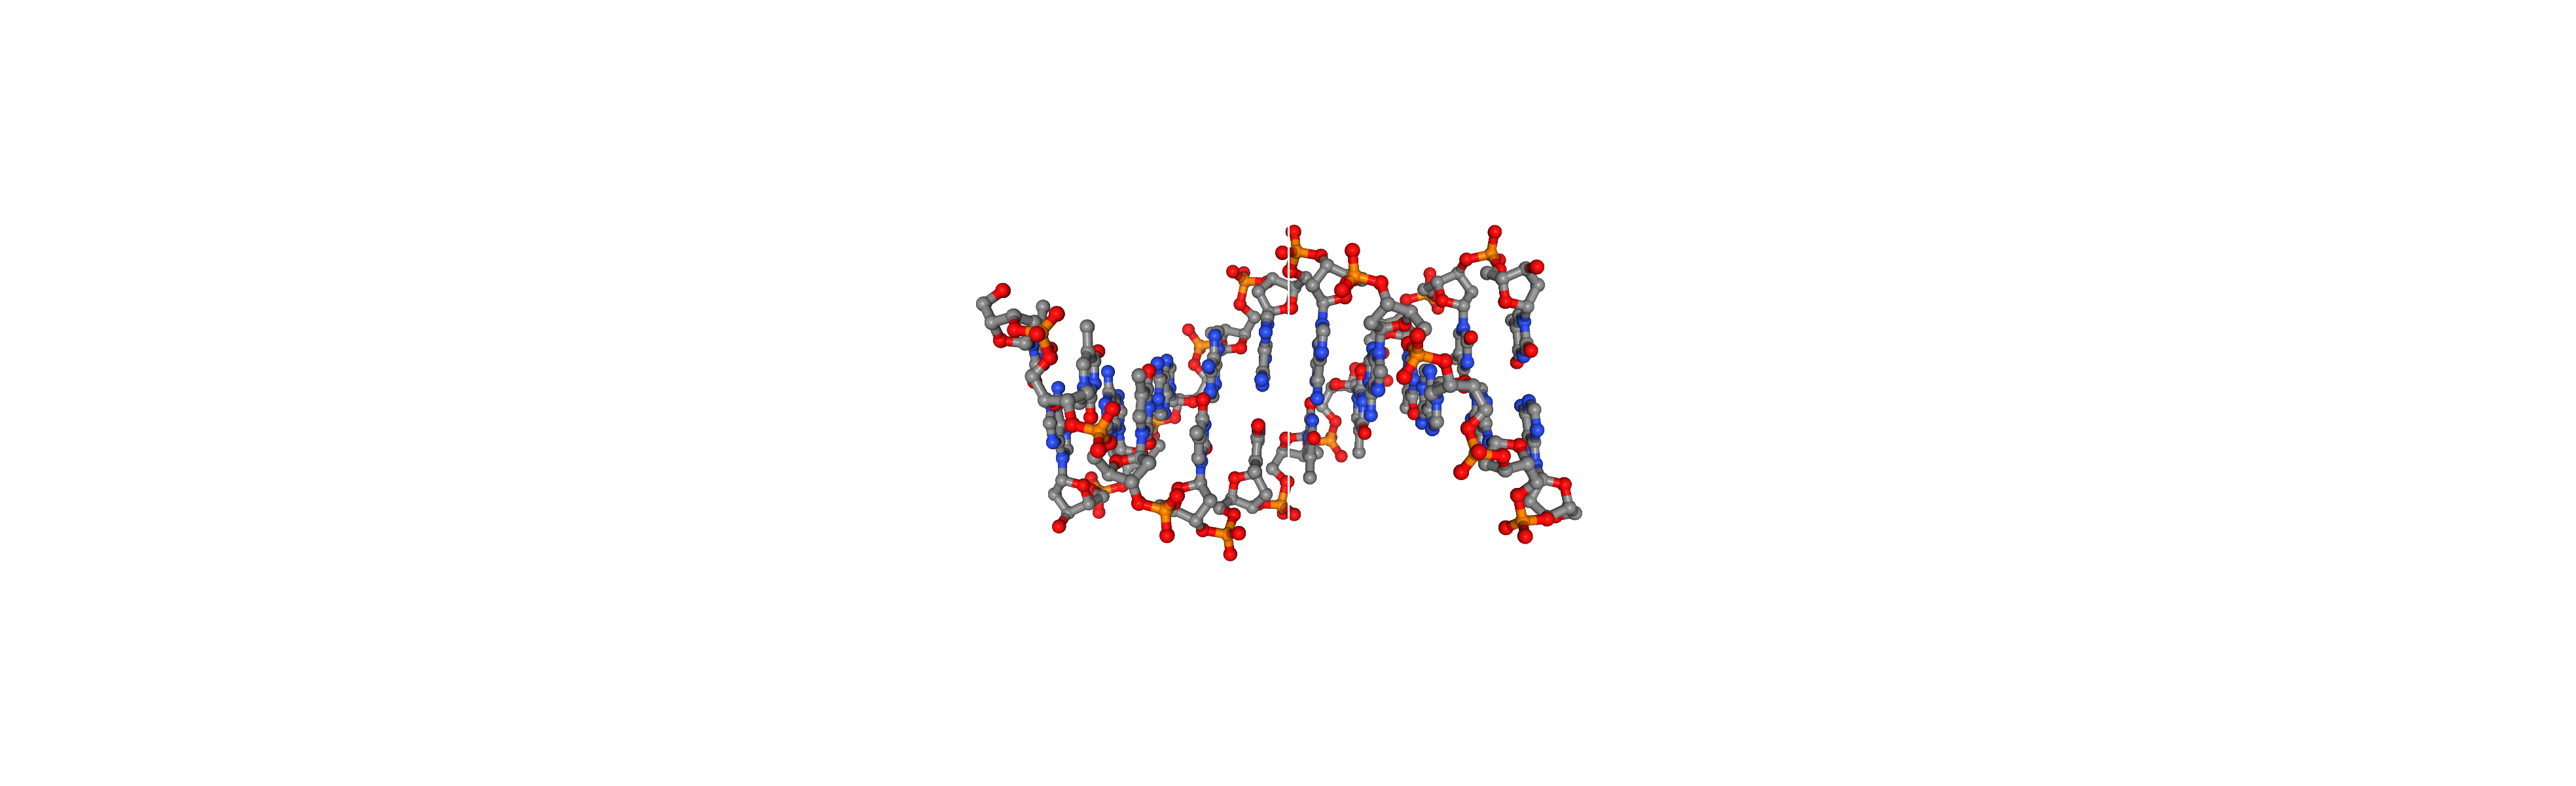

In [3]:
view._display_image()

In [121]:
!wget -N 'https://raw.githubusercontent.com/openmm/openmmforcefields/master/amber/files/tip3pfb.xml'

--2020-04-14 21:13:23--  https://raw.githubusercontent.com/openmm/openmmforcefields/master/amber/files/tip3pfb.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘tip3pfb.xml’

tip3pfb.xml         100%[===================>]   1.33K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2020-04-14 21:13:23 (35.9 MB/s) - ‘tip3pfb.xml’ saved [1359/1359]



In [123]:
#conda install -c omnia openmm
from simtk.openmm.app import *
from simtk.openmm import *
from simtk.unit import *
from sys import stdout

pdb = PDBFile('helix.pdb')
forcefield = ForceField('amber14-all.xml')
#forcedield = ForceField('DNA.OL15.xml','tip3p.xml')

In [124]:
pdb.getTopology()

<Topology; 2 chains, 20 residues, 404 atoms, 452 bonds>

In [125]:
modeller = Modeller (pdb.topology, pdb.positions)
modeller.addHydrogens (forcefield)
modeller.getTopology()

<Topology; 2 chains, 20 residues, 638 atoms, 686 bonds>

In [126]:
pdbfile.PDBFile.writeModel(modeller.topology,modeller.positions,open('output.pdb','w'))
traj = pt.load('output.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget()

In [127]:
# static image 
view.render_image()

In [128]:
view._display_image()

In [129]:
integrator = LangevinIntegrator(300*kelvin, 1/picosecond, 0.001*picoseconds)

In [130]:
system = forcefield.createSystem(modeller.topology)
simulation = Simulation(modeller.topology, system, integrator)
simulation.context.setPositions(modeller.positions)
simulation.minimizeEnergy()

In [131]:
simulation.reporters.append(PDBReporter('output.pdb',1))
simulation.reporters.append(StateDataReporter(stdout, 1, step=True,potentialEnergy=True, temperature=True))
simulation.step(10)

#"Step","Potential Energy (kJ/mole)","Temperature (K)"
1,1438.3175152434285,0.5326690234998956
2,1439.2438313134126,1.0502361066973254
3,1440.9792559667017,1.4893731262026209
4,1442.9742731764513,1.7961526610555205
5,1444.9722385425027,2.1399745153718572
6,1447.42737967713,2.455315329899987
7,1450.2104585921652,2.7267119049693243
8,1452.8847037181429,2.9051087109402727
9,1455.1314658030155,3.2806447946258293
10,1456.8825759664214,3.701684606168541


In [132]:
traj = pt.load('output.pdb')
pt.rotate(traj, 'y 90')
view = nv.show_pytraj(traj)
view

NGLWidget(count=10)